# Candy Regression

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats 

# display all columns of dataframe in notebook 
pd.pandas.set_option('display.max_columns', None)


### 1. Data Analysis


In [89]:
data = pd.read_csv("candy-data.csv")
print(data.shape)
data.head(5)

(85, 13)


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [90]:
# Maybe we can drop the competitorname label since we are not going to use the text in our model for now 
data.drop(columns='competitorname',inplace=True)
data.head(5)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


Let's analyse the target variable  'chocolate'


In [91]:
# Let's create a simple function to replace all 0/1 features to categorical text labels in case we need them 
def binary2cat(data,feature,feature_new):
    data[feature_new] = np.where(data[feature],feature,'no ' + feature)
    return data 

#data = binary2cat(data,'chocolate','chocolate_cat')


<AxesSubplot:>

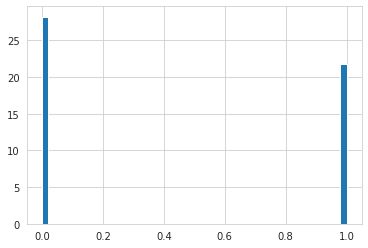

In [92]:

fig = plt.figure()
data['chocolate'].hist(bins=50,density=True)


So we can see that more products do not have chocolate and in order to get a cleare picture about their relative frequency we can calculate the frequencies . We have 2 binary classes for the chocolate feature and the variable is discreet so the problem can be seen as a classification problem and it is not really a regression problem. With 0 we denote the products with no chocolate and with 1 the products that have chocolate .

In [93]:
print('Counts :\n' ,data['chocolate'].value_counts(),)
print('\n')
print( 'Precentage :\n' ,data['chocolate'].value_counts() * 100 / len(data['chocolate'] ) )

Counts :
 0    48
1    37
Name: chocolate, dtype: int64


Precentage :
 0    56.470588
1    43.529412
Name: chocolate, dtype: float64


On the other hand the difference between the frequencies is not huge so we can not say that one class dominates 

## Categorical variables 
<ul><li>We will explore the dataset now and detect all the categorical variables, variables that have usually strings as values </li></ul>

In [94]:
# first indentify the list of features 
#features = [x for x in data.columns]
#features

In [96]:
# check if dtype = 'Object' , that means they are categorical 
cat_vars = [ var for var in data.columns if data[var].dtype == 'O' ]
len(cat_vars)

0

We do not have any categorical variables so we do not need any additional transformation for those kind of variables 


## Numerical Variables
<ul><li> Next we find the numerical variables </li></ul>

In [98]:
num_vars = [ var for var in data.columns if data not in cat_vars ]
print(num_vars)
print(len(num_vars))

['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']
12


## Missing Values 
Next we are going to search for missing values in any of our columns


In [100]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0 ] 
len(vars_with_na)

0

We can see that we have 0 missing values so we don't need any additional steps for those kind of variables 